# Run full Granual Predictions

What needs to happen:
- function to temporally and spatially interpolate MERRA2 
- function to read MERRA2 with interpolation
  - PS = surface_pressure
  - T10M = 10-meter_air_temperature (Andy will investigate)
  - TO3 = total_column_ozone
  - TQV = total_precipitable_water_vapor
- function to read VNP02MOD
  - observation_data
    - M14 (for center wavelengths at 8500 nm)
    - M15 (for center wavelengths at 10800 nm)
    - M16 (for center wavelengths at 12000 nm)
- function to read VNP03MOD
  - geolocation_data
    - sensor_azimuth
    - sensor_zenith
    - solar_azimuth
    - solar_zenith
- function to combine above for model inputs

## Setup

In [31]:
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 

In [24]:
open_vnp02 = xr.open_dataset("data/granules/VNP02MOD.A2020168.1448.002.2021127084950.nc", group="observation_data") 

# Access the relavant variables 
vnp02_variables = open_vnp02[['M14', 'M14_brightness_temperature_lut', 'M15', 'M15_brightness_temperature_lut', 'M16', 'M16_brightness_temperature_lut']]

In [25]:
open_vnp03 = xr.open_dataset("data/granules/VNP03MOD.A2020168.1448.002.2021125194020.nc", group="geolocation_data") 

# Access the relavant variables 
vnp03_variables = open_vnp03[['sensor_azimuth', 'sensor_zenith', 'solar_azimuth', 'solar_zenith']] 


In [27]:
# Merge the model imputs
vnp02_vnp03 = xr.merge([vnp02_variables, vnp03_variables]) 
print(vnp02_vnp03) 

# Access the relavant variables 
M14_ds = vnp02_vnp03 ['M14']  # thermal infared wave length
M14_BTL_ds = vnp02_vnp03 ['M14_brightness_temperature_lut']   
M15_ds = vnp02_vnp03 ['M15'] # thermal infared wave length   
M15_BTL_ds = vnp02_vnp03 ['M15_brightness_temperature_lut'] 
M16_ds = vnp02_vnp03 ['M16'] # thermal infared wave length  
M16_BTL_ds = vnp02_vnp03 ['M16_brightness_temperature_lut']   

# Convert to brightness temperature in K 
M14_scaled = vnp02_vnp03 ['M14_brightness_temperature_lut'][vnp02_vnp03['M14']] 
M15_scaled = vnp02_vnp03 ['M15_brightness_temperature_lut'][vnp02_vnp03['M15']] 
M16_scaled = vnp02_vnp03 ['M16_brightness_temperature_lut'][vnp02_vnp03['M16']] 



<xarray.Dataset>
Dimensions:                         (number_of_lines: 3232,
                                     number_of_pixels: 3200,
                                     number_of_LUT_values: 65536)
Dimensions without coordinates: number_of_lines, number_of_pixels,
                                number_of_LUT_values
Data variables:
    M14                             (number_of_lines, number_of_pixels) float32 ...
    M14_brightness_temperature_lut  (number_of_LUT_values) float32 ...
    M15                             (number_of_lines, number_of_pixels) float32 ...
    M15_brightness_temperature_lut  (number_of_LUT_values) float32 ...
    M16                             (number_of_lines, number_of_pixels) float32 ...
    M16_brightness_temperature_lut  (number_of_LUT_values) float32 ...
    sensor_azimuth                  (number_of_lines, number_of_pixels) float32 ...
    sensor_zenith                   (number_of_lines, number_of_pixels) float32 ...
    solar_azimuth          

TypeError: invalid indexer array, does not have integer dtype: array([[23.004303 , 23.004303 , 23.004303 , ..., 23.004303 , 23.004303 ,
        23.004303 ],
       [23.004303 , 23.004303 , 23.004303 , ..., 23.004303 , 23.004303 ,
        23.004303 ],
       [ 6.7024426,  7.1998105,  7.5146575, ...,  6.4069004,  6.3854895,
         6.2844014],
       ...,
       [ 2.8832083,  2.697529 ,  2.3651319, ...,  7.097669 ,  7.107848 ,
         7.1131134],
       [23.004303 , 23.004303 , 23.004303 , ..., 23.004303 , 23.004303 ,
        23.004303 ],
       [23.004303 , 23.004303 , 23.004303 , ..., 23.004303 , 23.004303 ,
        23.004303 ]], dtype=float32)

## 2D Plot of Input Variables

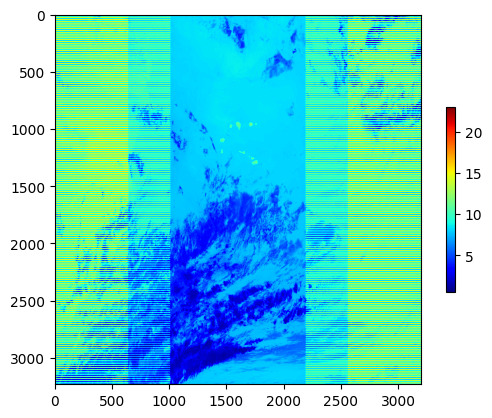

In [37]:
# M14 Map 
plt.imshow(M14_ds, cmap='jet') 
# Colorbar and lables  
cb = plt.colorbar(shrink=0.5) 
plt.show()

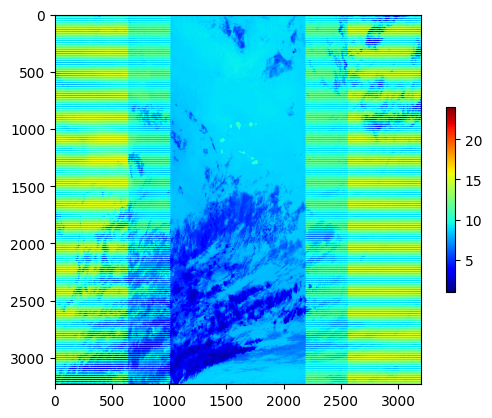

In [38]:
# M15 Map 
plt.imshow(M15_ds, cmap='jet') 
# Colorbar and lables  
cb = plt.colorbar(shrink=0.5) 
plt.show()

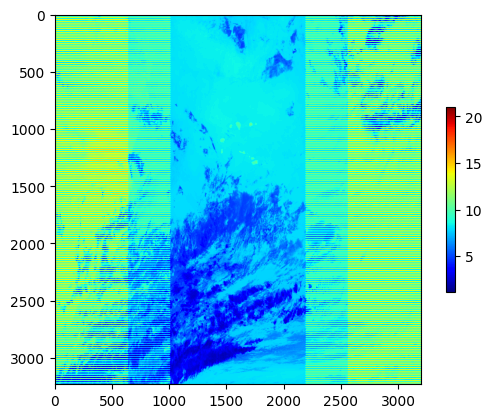

In [39]:
# M16 Map 
plt.imshow(M16_ds, cmap='jet') 
# Colorbar and lables  
cb = plt.colorbar(shrink=0.5) 
plt.show()

## 2D Plot of Predicted Dust Optical Thickness

## WIP / Scratch

In [ ]:
xr.open_dataset("data/rt_nn_irdust_training_data.nc")

<xarray.Dataset>
Dimensions:                 (npoints: 250000, nbands_viirs: 3)
Coordinates:
  * nbands_viirs            (nbands_viirs) float32 8.5e+03 1.08e+04 1.2e+04
Dimensions without coordinates: npoints
Data variables:
    solar_zenith_angle      (npoints) float32 ...
    viewing_zenith_angle    (npoints) float32 ...
    relative_azimuth_angle  (npoints) float32 ...
    viirs_bts               (nbands_viirs, npoints) float32 ...
    dust_optical_thickness  (npoints) float32 ...
    dust_central_height     (npoints) float32 ...
    spress                  (npoints) float32 ...
    h2o                     (npoints) float32 ...
    o3                      (npoints) float32 ...
    ws                      (npoints) float32 ...
    ts                      (npoints) float32 ...
Attributes:
    description:             Radiative transfer-based labelled training data ...
    suffix:                  nc
    version:                 20230803
    contact_person_address:  NASA/GSFC, Mail Code 616, 8800 Greenbelt Road, G...
    contact_person_email:     andrew.sayer@nasa.gov
    contact_person_name:      Andrew Sayer
    contact_person_role:     Scientific/technical contact
    data_set_language:       en
    file_format:             NetCDF4

In [ ]:
xr.open_dataset("data/granules/GMAO_MERRA2.20200616T140000.MET.nc")

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    PS        (lat, lon) float32 ...
    QV10M     (lat, lon) float32 ...
    SLP       (lat, lon) float32 ...
    T10M      (lat, lon) float32 ...
    TO3       (lat, lon) float32 ...
    TQV       (lat, lon) float32 ...
    U10M      (lat, lon) float32 ...
    V10M      (lat, lon) float32 ...
    FRSNO     (lat, lon) float32 ...
    FRSEAICE  (lat, lon) float32 ...
Attributes: (12/39)
    date_created:                      2022-03-02T06:13:36Z
    title:                             GMAO MERRA2 2D Hourly,  Instantaneous,...
    product_name:                      GMAO_MERRA2.20200616T140000.MET.nc
    history:                           gmao_met_merge -asm MERRA2_400.inst1_2...
    time_coverage_start:               2020-06-16T14:00:00Z
    time_coverage_end:                 2020-06-16T14:00:00Z
    ...                                ...
    identifier_product_doi:            10.5067/3Z173KIE2TPD;10.5067/RKPHT8KC1...
    processing_level:                  L4
    cdm_data_type:                     grid
    spatialResolution:                 0.5x0.625 degrees
    source:                            MERRA2_400.inst1_2d_asm_Nx.20200616.nc...
    comment:                           This file contains a subset of variabl...